*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


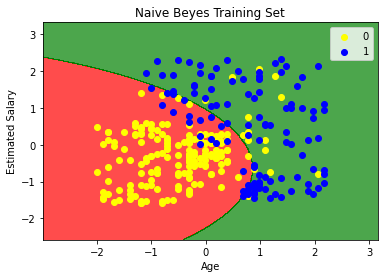

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, -1].values

# print(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# print(X_train);

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train);
X_test = sc.transform(X_train)

# print(X_train)

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

# print(y_pred)

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test,y_pred)
# print(cm)

from matplotlib.colors import ListedColormap
x_set, y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max() + 1, step = 0.01), 
                    np.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha = 0.7, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) : 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j , 1],
        c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title("Naive Beyes Training Set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()